| MSSV     | Họ và tên       |
|----------|-----------------|
| 19120511 | Võ Văn Hiếu     |
| 19120526 | Huỳnh Đức Huy   |
| 19120539 | Vương Thế Khang |

## Import

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_colwidth', 9999)
sns.set_theme(style = 'whitegrid')

# A. THU THẬP DỮ LIỆU

Bộ dữ liệu mà nhóm chọn là bộ dữ liệu doanh số bán ô tô bao gồm thông tin về các loại ô tô khác nhau. Bộ dữ liệu này được lấy từ Analytixlabs cho mục đích dự đoán.

Các file dữ liệu này bao gồm:
- File "Car_sales.csv": bộ dữ liệu được thu thập từ [Kaggle](https://www.kaggle.com/datasets/gagandeep16/car-sales).

Người thu thập dữ liệu: GaganBhatia [@gagandeep16](https://www.kaggle.com/gagandeep16)

License: CC0 1.0 Universal (CC0 1.0) Public Domain Dedication

# B. KHÁM PHÁ DỮ LIỆU

Đầu tiên, ta sẽ xem thử bộ dữ liệu trông như thế nào. Đọc dữ liệu từ file "Car_sales.csv" và lưu vào dataframe `car_df`.

In [2]:
car_df = pd.read_csv('https://raw.githubusercontent.com/vt-khang/KHDLUD_Tuan4/main/Car_sales.csv')
car_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
car_df.shape

(157, 16)

Vậy dữ liệu có kích thước **157 dòng x 16 cột**.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin và doanh số bán hàng của một mẫu ô tô, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_row = any(car_df.duplicated(subset = ['Manufacturer', 'Model']))
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

### Mỗi cột có ý nghĩa gì?

| Cột                 | Ý nghĩa                     |
| ------------------- | --------------------------- |
| Manufacturer        | Hãng sản xuất               |
| Model               | Mẫu xe                      |
| Sales_in_thousands  | Doanh thu                   |
| __year_resale_value | Giá trị của năm bán lại     |
| Vehicle_type        | Loại phương tiện giao thông |
| Price_in_thousands  | Giá thành                   |
| Engine_size         | Kích thước động cơ          |
| Horsepower          | Mã lực                      |
| Wheelbase           | Chiều dài cơ sở             |
| Width               | Chiều rộng                  |
| Length              | Chiều dài                   |
| Curb_weight         | Trọng lượng ướt             |
| Fuel_capacity       | Lượng nhiên liệu            |
| Fuel_efficiency     | Tiết kiệm nhiên liệu        |
| Latest_Launch       | Lần ra mắt gần nhất         |
| Power_perf_factor   | Hệ số công suất             |

### Mỗi cột hiện đang có kiểu dữ liệu gì?

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Như vậy có thể thấy:
- Các cột "Manufacturer", "Model", "Vehicle_type" đang có kiểu dữ liệu `object`. Ta cần đưa các cột này về dạng `category`.
- Cột "Latest_Launch" đang có kiểu dữ liệu `object`. Ta cần đưa cột này về dạng `datetime`.

Ta sẽ làm điều này ở bước tiền xử lý dữ liệu.

---

**Tiền xử lý dữ liệu**: Thay đổi kiểu dữ liệu

Thay đổi kiểu dữ liệu của các cột "Manufacturer", "Model", "Vehicle_type" sang kiểu dữ liệu dạng `category`.

In [6]:
car_df[['Manufacturer', 'Model', 'Vehicle_type']] = car_df[['Manufacturer', 'Model', 'Vehicle_type']].astype('category')

Thay đổi kiểu dữ liệu của cột "Latest_Launch" sang kiểu dữ liệu dạng `datetime`.

In [7]:
car_df['Latest_Launch'] = car_df['Latest_Launch'].astype('datetime64')

Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [8]:
car_df.dtypes

Manufacturer                 category
Model                        category
Sales_in_thousands            float64
__year_resale_value           float64
Vehicle_type                 category
Price_in_thousands            float64
Engine_size                   float64
Horsepower                    float64
Wheelbase                     float64
Width                         float64
Length                        float64
Curb_weight                   float64
Fuel_capacity                 float64
Fuel_efficiency               float64
Latest_Launch          datetime64[ns]
Power_perf_factor             float64
dtype: object

---

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numerical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị nhỏ nhất (min), giá trị trung bình (mean), giá trị lớn nhất (max), các khoảng tứ phân vị (Q1, Q2, Q3) và độ lệch chuẩn (std). Sau đó ta sẽ lưu các giá trị này vào dataframe `numerical_col_df` thành 10 dòng là "num_missing_val", "ratio_missing_val", "count", "min", "mean", "max", "Q1", "Q2", "Q3", "std".

In [9]:
def num_missing_val(s):
  return s.isna().sum()
def ratio_missing_val(s):
  return s.isna().mean() * 100
def count(s):
  return s.count();
def Q1(s):
  return s.quantile(0.25)
def Q2(s):
  return s.quantile(0.5)
def Q3(s):
  return s.quantile(0.75)

numerical_cols = car_df.select_dtypes(include = 'number').columns
numerical_col_df = car_df[numerical_cols].agg([num_missing_val, ratio_missing_val, count, min, np.mean, max, Q1, Q2, Q3, np.std]).T
numerical_col_df[['num_missing_val', 'count']] = numerical_col_df[['num_missing_val', 'count']].astype(int)
numerical_col_df

,num_missing_val,ratio_missing_val,count,min,mean,max,Q1,Q2,Q3,std
Sales_in_thousands,0,0.000000,157,0.110000,52.998076,540.561000,14.114000,29.450000,67.956000,68.029422
__year_resale_value,36,22.929936,121,5.160000,18.072975,67.550000,11.260000,14.180000,19.875000,11.453384
Price_in_thousands,2,1.273885,155,9.235000,27.390755,85.500000,18.017500,22.799000,31.947500,14.351653
Engine_size,1,0.636943,156,1.000000,3.060897,8.000000,2.300000,3.000000,3.575000,1.044653
Horsepower,1,0.636943,156,55.000000,185.948718,450.000000,149.500000,177.500000,215.000000,56.700321
Wheelbase,1,0.636943,156,92.600000,107.487179,138.700000,103.000000,107.000000,112.200000,7.641303
Width,1,0.636943,156,62.600000,71.150000,79.900000,68.400000,70.550000,73.425000,3.451872
Length,1,0.636943,156,149.400000,187.343590,224.500000,177.575000,187.900000,196.125000,13.431754
Curb_weight,2,1.273885,155,1.895000,3.378026,5.572000,2.971000,3.342000,3.799500,0.630502
Fuel_capacity,1,0.636943,156,10.300000,17.951923,32.000000,15.800000,17.200000,19.575000,3.887921


Ta thấy có xuất hiện các giá trị bị thiếu ở các cột "year_resale_value", "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor", trong đó cột "year_resale_value" có tỉ lệ giá trị bị thiếu nhiều nhất **(~23%)** so với các cột còn lại.

Có vẻ các thống kê mô tả của các cột dạng số không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với mỗi cột categorical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị xuất hiện nhiều nhất (mode), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu các giá trị này vào dataframe `categical_col_df` thành 6 dòng là "num_missing_val", "ratio_missing_val", "count", "most_frequency", "num_diff_vals", "diff_vals".

In [10]:
def num_diff_vals(s):
  return s.nunique()
def diff_vals(s):
  return s.dropna().astype('object').unique()
def most_frequency(s):
  return s.mode()[0]

categorical_cols = car_df.select_dtypes(include = 'category').columns
categorical_col_df = car_df[categorical_cols].agg([num_missing_val, ratio_missing_val, count, most_frequency, num_diff_vals, diff_vals]).T
categorical_col_df[['num_missing_val', 'count']] = categorical_col_df[['num_missing_val', 'count']].astype(int)
categorical_col_df

,num_missing_val,ratio_missing_val,count,most_frequency,num_diff_vals,diff_vals
Manufacturer,0,0.0,157,Dodge,30,"[Acura, Audi, BMW, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ford, Honda, Hyundai, Infiniti, Jaguar, Jeep, Lexus, Lincoln, Mitsubishi, Mercury, Mercedes-B, Nissan, Oldsmobile, Plymouth, Pontiac, Porsche, Saab, Saturn, Subaru, Toyota, Volkswagen, Volvo]"
Model,0,0.0,157,Neon,156,"[Integra, TL, CL, RL, A4, A6, A8, 323i, 328i, 528i, Century, Regal, Park Avenue, LeSabre, DeVille, Seville, Eldorado, Catera, Escalade, Cavalier, Malibu, Lumina, Monte Carlo, Camaro, Corvette, Prizm, Metro, Impala, Sebring Coupe, Sebring Conv., Concorde, Cirrus, LHS, Town & Country, 300M, Neon, Avenger, Stratus, Intrepid, Viper, Ram Pickup, Ram Wagon, Ram Van, Dakota, Durango, Caravan, Escort, Mustang, Contour, Taurus, Focus, Crown Victoria, Explorer, Windstar, Expedition, Ranger, F-Series, Civic, Accord, CR-V, Passport, Odyssey, Accent, Elantra, Sonata, I30, S-Type, Wrangler, Cherokee, Grand Cherokee, ES300, GS300, GS400, LS400, LX470, RX300, Continental, Town car, Navigator, Mirage, Eclipse, Galant, Diamante, 3000GT, Montero, Montero Sport, Mystique, Cougar, Sable, Grand Marquis, Mountaineer, Villager, C-Class, E-Class, S-Class, SL-Class, SLK, SLK230, CLK Coupe, CL500, ...]"
Vehicle_type,0,0.0,157,Passenger,2,"[Passenger, Car]"


Hầu hết các cột dạng phân loại không có gì bất thường.

# C. TRỰC QUAN HÓA DỮ LIỆU

### Sự phân bố của dữ liệu đối với các cột dạng số

Ta sẽ dùng các biểu đồ boxplot đối với các cột dạng số để thể hiện sự phân bố của dữ liệu. Trong đó:
- Các cận bên trái và bên phải tương ứng với giá trị nhỏ nhất (min) và giá trị lớn nhất (max) của dữ liệu.
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ ba (Q3).
- Đường ở giữa hình hộp tương ứng với giá trị trung bình (mean).
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

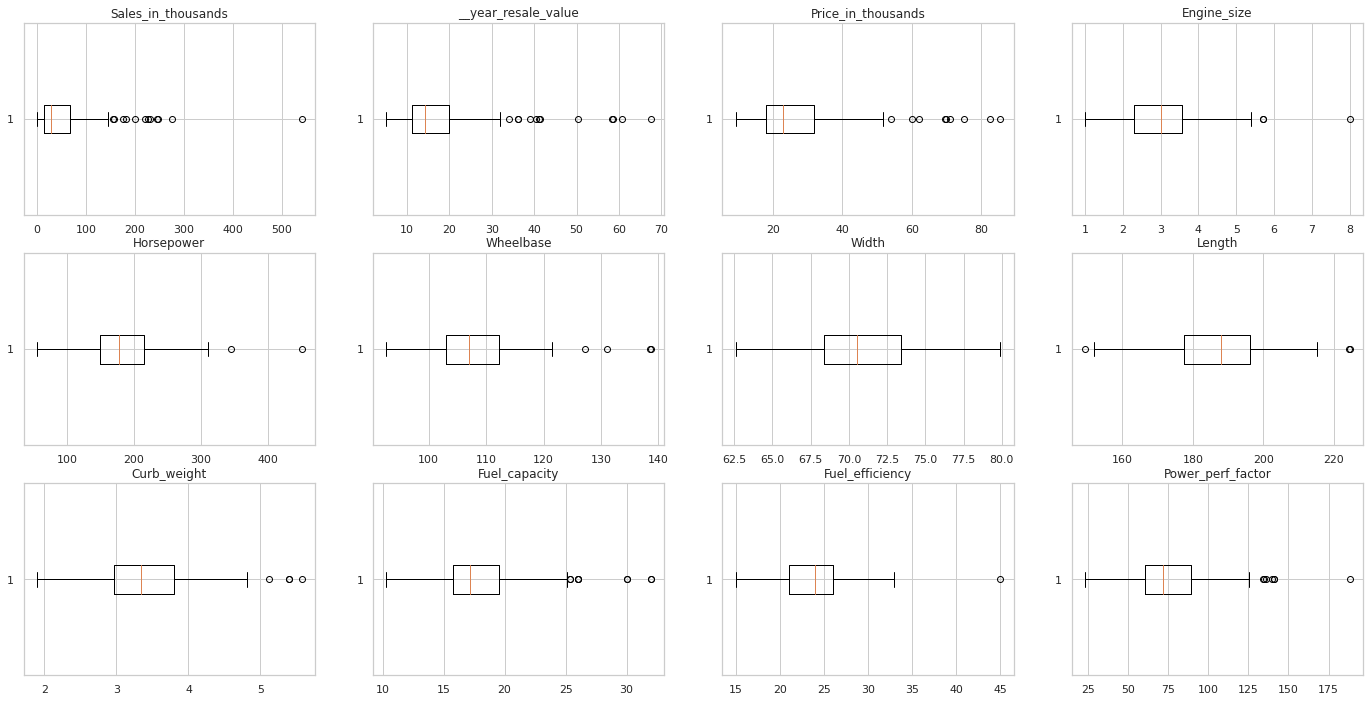

In [11]:
fig, axs = plt.subplots(3, 4, figsize = (24, 12))
row, col = 0, 0
for numerical_col in numerical_cols:
    axs[row, col].set_title(numerical_col)
    axs[row, col].boxplot(car_df[numerical_col].dropna(), vert = False)
    col += 1
    if col >= 4:
        col = 0
        row += 1

**Nhận xét:** Quan sát các biểu đồ boxplot, ta nhận thấy:
- Hầu hết các đặc trưng của dữ liệu đều có xuất hiện outlier, một số cột có tồn tại outlier nhưng với số lượng ít như "Engine_size", "Horsepower", "Length", "Curb_weight", "Fuel_efficiency". Cột "Width" không thấy xuất hiện outlier.
- Các cột "Sales_in_thousands", "year_release_value", "Price_in_thousands" là các cột có xuất hiện khá nhiều outlier, trong đó cột "Sales_in_thousands" và "Price_in_thousands" là các cột có chứa thông tin có giá trị, do đó ta cần lưu ý các cột này trong bước tiền xử lý dữ liệu.

Để biết bản chất thật sự các outlier có ảnh hưởng nhiều tới tập dữ liệu hay không, ta cần phải xử lý outlier. Do đó, ta sẽ làm điều này ở bước tiền xử lý dữ liệu.

### Biểu diễn sự phân phối của các Hãng sản xuất ô tô

Ta sẽ dùng biểu đồ cột để thể hiện số lượng mẫu xe được sản xuất theo từng hãng sản xuất. Trong đó:
- Trục hoành: thể hiện tên các hãng sản xuất của cột "Manufacturer".
- Trục tung: thể hiện số lượng mẫu xe.

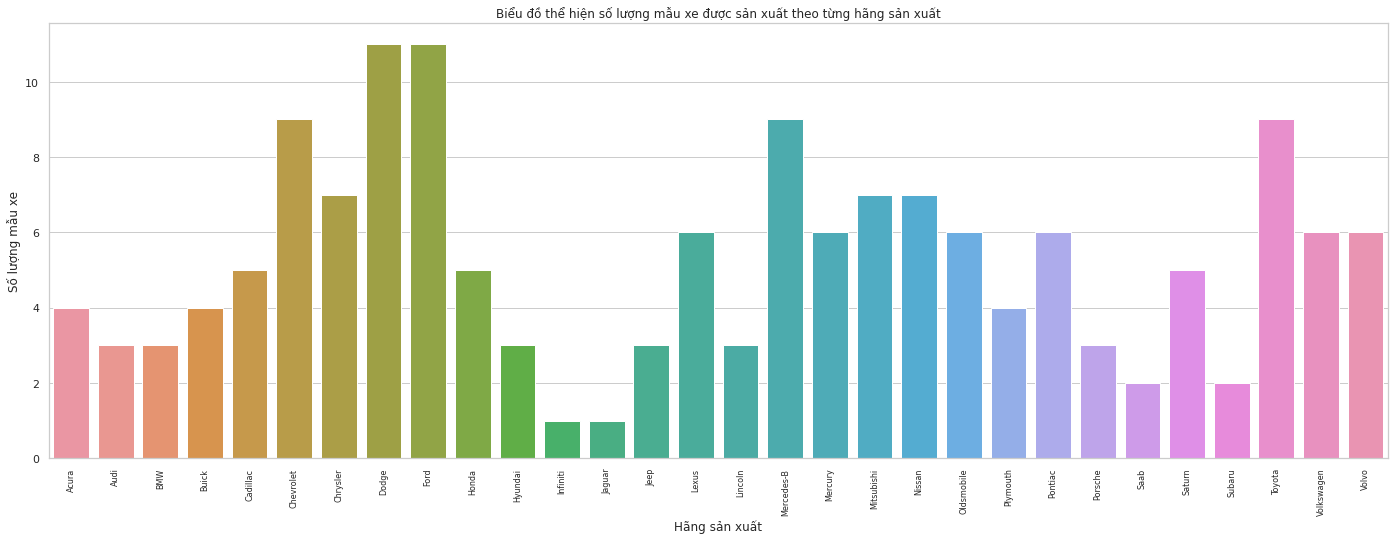

In [12]:
fig, ax = plt.subplots(figsize = (24, 8))
sns.countplot(data = car_df, x = 'Manufacturer', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
plt.title('Biểu đồ thể hiện số lượng mẫu xe được sản xuất theo từng hãng sản xuất')
plt.xlabel('Hãng sản xuất')
plt.ylabel('Số lượng mẫu xe')
plt.show()

Sau đó, ta sẽ dùng biểu đồ cột để thể hiện giá thành trung bình bán ô tô của mỗi hãng sản xuất. Trong đó:
- Trục hoành: thể hiện tên các hãng sản xuất của cột "Manufacturer".
- Trục tung: thể hiện giá thành trung bình bán ô tô.

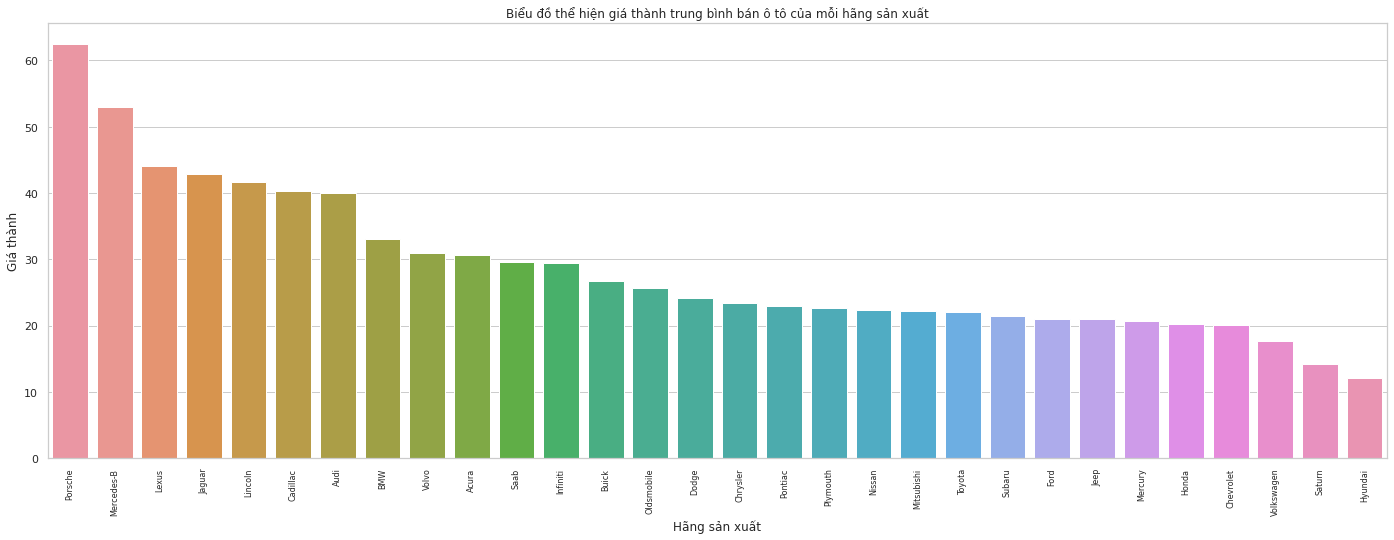

In [13]:
fig, ax = plt.subplots(figsize = (24, 8))
mean_price_manufacturer_df = car_df[['Manufacturer', 'Price_in_thousands']].groupby(['Manufacturer'], as_index = False).mean().sort_values(by = 'Price_in_thousands', ascending = False)
sns.barplot(data = mean_price_manufacturer_df, x = 'Manufacturer', y = 'Price_in_thousands', ax = ax, order = mean_price_manufacturer_df['Manufacturer'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
plt.title('Biểu đồ thể hiện giá thành trung bình bán ô tô của mỗi hãng sản xuất')
plt.xlabel('Hãng sản xuất')
plt.ylabel('Giá thành')
plt.show()

**Nhận xét:** Quan sát 2 biểu đồ trên, ta nhận thấy:
- Số lượng mẫu xe và giá thành trung bình bán ô tô của các hãng sản xuất có sự phân phối không đồng đều.
- Hãng Dodge và Ford đều có số lượng mẫu xe nhiều nhất, trong khi đó hãng Rorsche có số lượng mẫu xe ít nhất.
- Giá thành trung bình bán ô tô của hãng Ford là cao nhất, giá thành trung bình bán ô tô của hãng Rorsche là thấp nhất trong các hãng sản xuất ô tổ.
- Có sự phân chia giữa hãng có giá thành trung bình thấp và cao ở mức 30. Ta có thay thế thành các nhãn của cột "Manufacturer" ở bước tiền xử lý dữ liệu.

### Biểu diễn sự phân phối giữa Passenger và Car

Ta sẽ dùng biểu đồ tròn để thể hiện sự phân phối giữa Passenger và Car. Trong đó:
- Màu xanh: tỉ lệ % của Passenger.
- Màu cam: tỉ lệ % của Car.

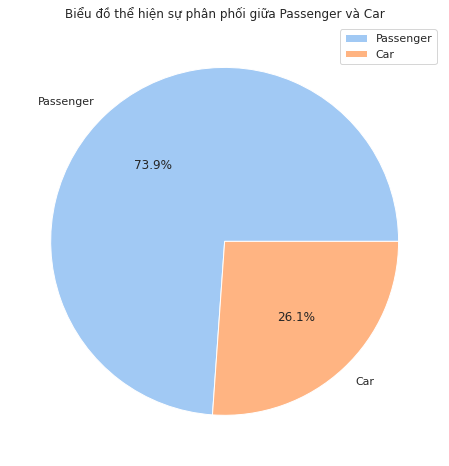

In [14]:
plt.figure(figsize = (12, 8))
vehicle_type_df = car_df['Vehicle_type'].value_counts()
plt.pie(vehicle_type_df, labels = vehicle_type_df.index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Biểu đồ thể hiện sự phân phối giữa Passenger và Car')
plt.legend()
plt.show()

Sau đó, ta sẽ dùng biểu đồ tròn để thể hiện giá thành trung bình giữa Passenger và Car. Trong đó:
- Màu xanh: tỉ lệ % giá thành trung bình của Passenger.
- Màu cam: tỉ lệ % giá thành trung bình của Car.

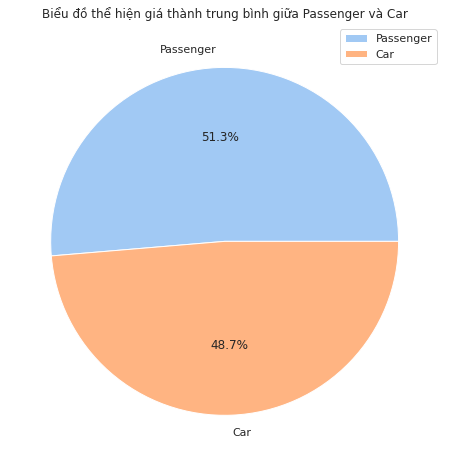

In [15]:
plt.figure(figsize = (12, 8))
mean_price_vehicle_type_df = car_df[['Vehicle_type', 'Price_in_thousands']].groupby(['Vehicle_type'], as_index = False).mean().sort_values(by = 'Price_in_thousands', ascending = False)
plt.pie(mean_price_vehicle_type_df['Price_in_thousands'], labels = mean_price_vehicle_type_df['Vehicle_type'], colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Biểu đồ thể hiện giá thành trung bình giữa Passenger và Car')
plt.legend()
plt.show()

**Nhận xét:** Quan sát 2 biểu đồ trên, ta nhận thấy rằng số lượng Passenger nhiều gấp 3 lần số lượng Car, trong khi đó giá thành giữa Passenger và Car có sự tương đồng với nhau.

# D. TIỀN XỬ LÝ DỮ LIỆU

Đầu tiên, ta sẽ lưu dữ liệu từ dataframe `car_df` vào dataframe `new_car_df` để tránh xảy ra lỗi trong quá trình tiền xử lý dữ liệu.

In [16]:
new_car_df = car_df.copy()

### Nhận dạng và xử lý outlier của các cột dạng số

Các outlier thường có xu hướng làm sai lệch dữ liệu dẫn tới các dự đoán mô hình không chính xác. Ta có thể thấy các outlier xuất hiện dựa vào các biểu đồ boxplot đã trực quan hóa ở trên. Do đó, ta sẽ sử dụng phương pháp Tukey để loại bỏ các outlier này. Có thể tham khảo [đường dẫn](https://www.itl.nist.gov/div898/handbook/prc/section4/prc471.htm) sau về phương pháp này.

Ở đây, chúng ta sẽ định nghĩa hàm `detect_outliers()` dùng để duyệt qua từng đặc trưng của dữ liệu và phát hiện ra các giá trị outlier có xuất hiện trong đặc trưng đó không. Hàm này bao gồm 3 tham số đầu vào:
- `df`: dataframe dữ liệu
- `n`: số cột tối thiểu có xuất hiện outlier
- `features_list`: danh sách các đặc trưng

Trong mỗi vòng lặp, một điểm dữ liệu được coi là outlier nếu nó nhỏ hơn tứ phân vị thứ nhất (Q1) trừ đi bước ngoại lệ hoặc vượt quá tứ phân vị thứ 3 (Q3) cộng với bước ngoại lệ. Bước ngoại lệ bằng 1,5 lần độ trải giữa (IQR). Khi các giá trị outlier thỏa điều kiện xác định cho một đặc trưng, chỉ mục của nó sẽ được lưu vào `outlier_indices` và tiếp tục tới các đặc trưng tiếp theo, quá trình này lặp lại cho đến khi duyệt qua hết các đặc trưng trong danh sách `features_list`. Cuối cùng, ta sẽ lọc qua chỉ mục của các outlier nếu nó thỏa điều kiện số cột tối thiểu có xuất hiện outlier `n` và trả về danh sách chỉ mục của các outlier đó.

In [17]:
# Reference: https://www.kaggle.com/code/gadigevishalsai/car-sales-price-prediction-eda-regression#4.1-Detect-and-remove-outliers-in-numerical-variables
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

In [18]:
outlier_indices = detect_outliers(new_car_df, 2, numerical_cols)
outlier_indices

[]

Chúng ta có thể thấy rằng thực chất không có outlier nào xuất hiện trong tập dữ liệu.

### Xử lý các giá trị bị thiếu

Dựa vào bảng thống kê mô tả của các đặc trưng ở trên, ta thấy có xuất hiện các giá trị bị thiếu ở các cột "year_resale_value", "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor".

Tuy nhiên cột "Price_in_thousands" có tỉ lệ % giá trị bị thiếu khá ít và do nó là cột có chứa dữ liệu quan trọng nên ta sẽ chọn cách bỏ đi các mẫu có chứa giá trị bị thiếu ở cột này để tránh làm sai lệch dữ liệu.

In [19]:
new_car_df = new_car_df[new_car_df['Price_in_thousands'].notna()]

Xem thử các giá trị bị thiếu sau khi bỏ đi vài dòng.

In [20]:
new_car_df.isnull().sum().sort_values(ascending = False)

__year_resale_value    36
Fuel_efficiency         2
Curb_weight             1
Manufacturer            0
Model                   0
Sales_in_thousands      0
Vehicle_type            0
Price_in_thousands      0
Engine_size             0
Horsepower              0
Wheelbase               0
Width                   0
Length                  0
Fuel_capacity           0
Latest_Launch           0
Power_perf_factor       0
dtype: int64

Ta thấy có xuất hiện các giá trị bị thiếu ở 3 cột "year_resale_value", "Fuel_efficiency", "Curb_weight".

Ta sẽ xử lý bằng cách điền giá trị trung vị (median) vào các ô bị thiếu này vì giá trị trung vị sẽ giữ cho sự phân phối của dữ liệu không bị thay đổi nhiều.

In [21]:
temp_df = new_car_df.copy()
temp_df['__year_resale_value'] = temp_df['__year_resale_value'].fillna(new_car_df['__year_resale_value'].dropna().median())
temp_df['Fuel_efficiency'] = temp_df['Fuel_efficiency'].fillna(new_car_df['Fuel_efficiency'].dropna().median())
temp_df['Curb_weight'] = temp_df['Curb_weight'].fillna(new_car_df['Curb_weight'].dropna().median())
new_car_df = temp_df

Kiểm tra lại các giá trị bị thiếu có còn xuất hiện sau khi tiền xử lý.

In [22]:
new_car_df.isnull().sum().sort_values(ascending = False)

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

Cuối cùng, cột "Model" có chứa thông tin phân biệt và không thể dùng cho các mô hình học máy sau này. Do đó, ta sẽ bỏ đi cột "Model".

In [23]:
new_car_df.drop(['Model'], axis = 1, inplace = True)
new_car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812
153,Volvo,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495
154,Volvo,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978
155,Volvo,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357


Sau khi xử lý các giá trị bị thiếu, số chiều của dữ liệu đã giảm còn **155 dòng x 15 cột**.

### Khám phá đặc trưng (Feature Engineering)

Dựa vào biểu đồ thể hiện giá thành trung bình bán ô tô của mỗi hãng sản xuất ở trên, ta thấy có sự phân chia rõ rệt giữa hãng sản xuất có giá thành trung bình thấp và hãng sản xuất có giá thành trung bình cao ở mức 30. Do đó, ta sẽ chia cột "Manufacturer" thành 2 lớp hãng xe sau:
- Hãng xe có giá thành trung bình <= 30 được gán nhãn là 1 (giá thấp).
- Hãng xe có giá thành trung bình > 30 được gán nhãn là 2 (giá cao).

Sau đó, ta sẽ dùng biểu đồ tròn để thể hiện sự phân phối giữa giá cao và giá thấp. Trong đó:
- Màu xanh: tỉ lệ % của giá cao.
- Màu cam: tỉ lệ % của giá thấp.

In [24]:
manufacturer_class = new_car_df[new_car_df['Price_in_thousands'] <= 30]['Manufacturer'].unique()
new_car_df['Manufacturer'] = new_car_df['Manufacturer'].apply(lambda x: 1 if x in manufacturer_class else 2)

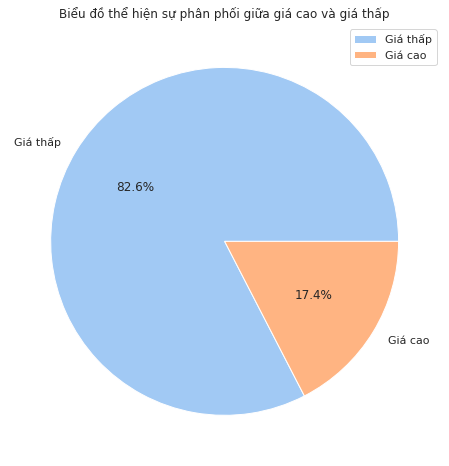

In [25]:
plt.figure(figsize = (12, 8))
manufacturer_df = new_car_df['Manufacturer'].value_counts()
plt.pie(manufacturer_df, labels = ['Giá thấp', 'Giá cao'], colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Biểu đồ thể hiện sự phân phối giữa giá cao và giá thấp')
plt.legend()
plt.show()

Quan sát biểu đồ trên, ta thấy dữ liệu có sự chênh lệch nhiều giữa giá cao và giá thấp sau khi gán nhãn.

Tiếp theo, ta sẽ tạo ra cột "Age" để tính số tuổi của mẫu xe. Số tuổi được tính bằng năm hiện tại trừ đi năm của thời điểm ra mắt mẫu xe lấy từ cột "Latest_Launch". Sau đó bỏ đi cột "Latest_Launch".

In [26]:
current_year = dt.date.today().year
new_car_df['Age'] = new_car_df['Latest_Launch'].apply(lambda x: current_year - x.year)
new_car_df.drop(['Latest_Launch'], axis = 1, inplace = True)

In [27]:
new_car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,1,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,11
1,1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,12
3,1,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,12
4,1,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,12
5,1,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,12
153,1,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,11
154,1,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,12
155,1,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,12


Có vẻ các cột dữ liệu sau khi khám phá đặc trưng đều ổn.

### Chuyển đổi dữ liệu (Data Trasformation)

Ta sẽ dùng các biểu đồ histogram đối với các cột dạng số để biết được sự phân phối của dữ liệu, tuy nhiên ta không cần lấy cột "Manufacturer" và "Age" vì đã thực hiện tiền xử lý ở bước trên. Với mỗi biểu đồ histogram ta cũng cần tính độ lệch (Skewness) tương ứng. Trong đó:
- Nếu độ lệch của đặc trưng đó có giá trị âm chứng tỏ phân phối dữ liệu của đặc trưng đó bị lệch trái.
- Nếu độ lệch của đặc trưng đó có giá trị dương chứng tỏ phân phối dữ liệu của đặc trưng đó bị lệch phải.

Ta sẽ xét độ lệch của mỗi đặc trưng nếu nhỏ hơn -1 hoặc lớn hơn 1 sẽ được lưu vào `skewed_features` và sẽ được dùng để tiền xử lý đưa về dạng chuẩn. Ta sẽ không xét cột "Price_in_thousands" vì có chứa dữ liệu quan trọng không thể thay đổi.

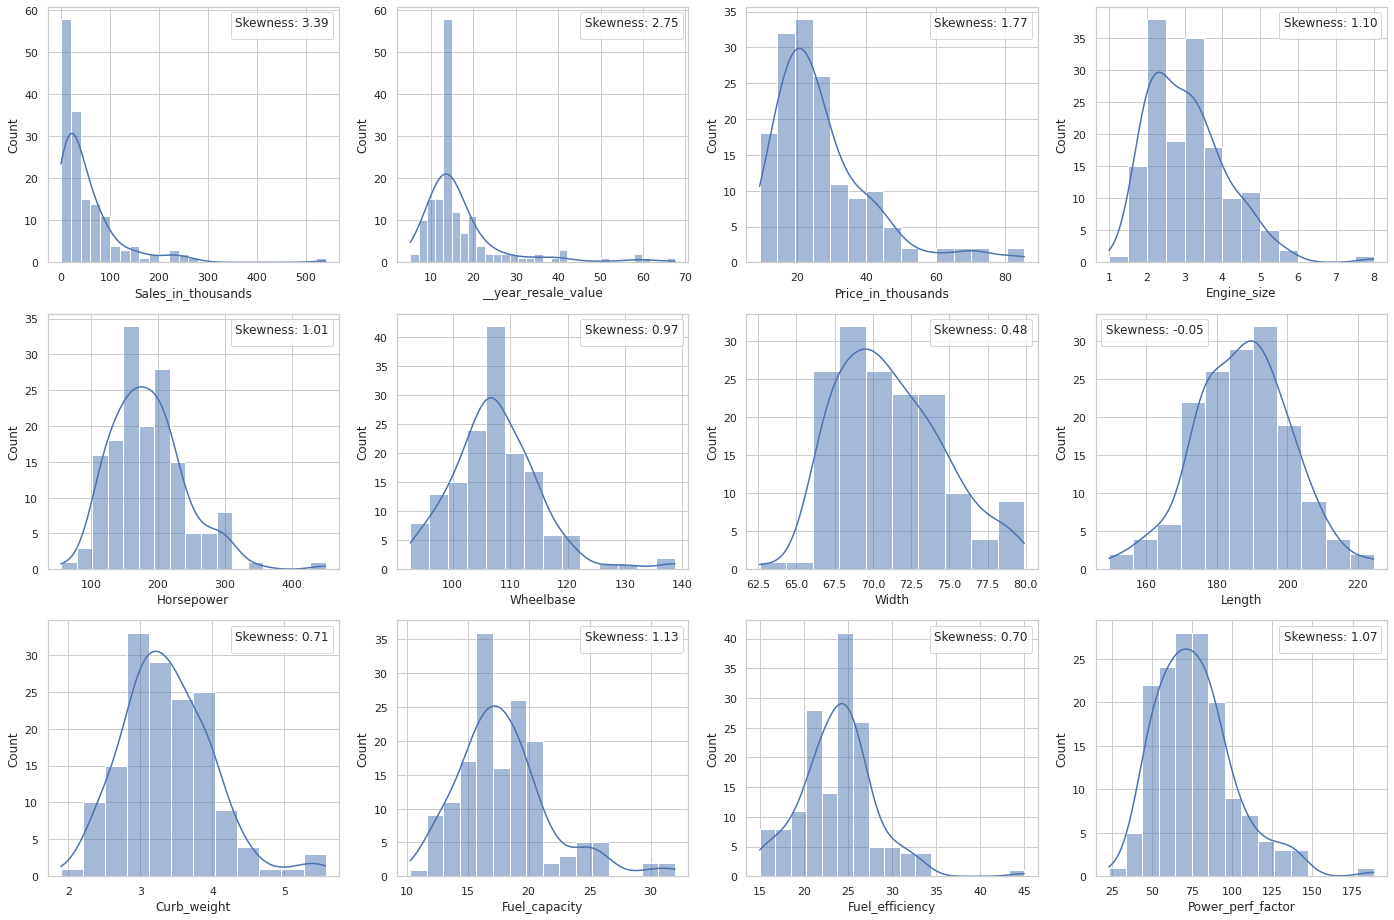

In [28]:
transform_features = new_car_df.select_dtypes(include = 'number').columns.drop(['Manufacturer', 'Age'])
skewed_features = []

fig, axs = plt.subplots(3, 4, figsize = (24, 16))
row, col = 0, 0
for feature in transform_features:
    skewness = new_car_df[feature].skew()
    if np.abs(skewness) > 1:
        skewed_features.append(feature)
    axs[row, col].legend(loc = 'best', labels = ['_'], title = 'Skewness: %.2f'%(skewness))
    sns.histplot(new_car_df[feature], kde = True, legend = True, ax = axs[row, col])
    col += 1
    if col >= 4:
        col = 0
        row += 1

skewed_features.remove('Price_in_thousands')

Từ các biểu đồ trên, ta sẽ loại bỏ độ lệch hiện có của các cột "Sales_in_thousands", "year_resale_value", "Engine_size", "Horsepower", "Fuel_capacity", "Power_perf_factor" và đưa dữ liệu gần giống với phân phối chuẩn bằng phương pháp Box Cox Transformation.

Sau đó, ta cũng dùng các biểu đồ histogram đối với các cột dữ liệu thuộc `skewed_features` để biết được sự phân phối của dữ liệu sau khi đã chuyển đổi.

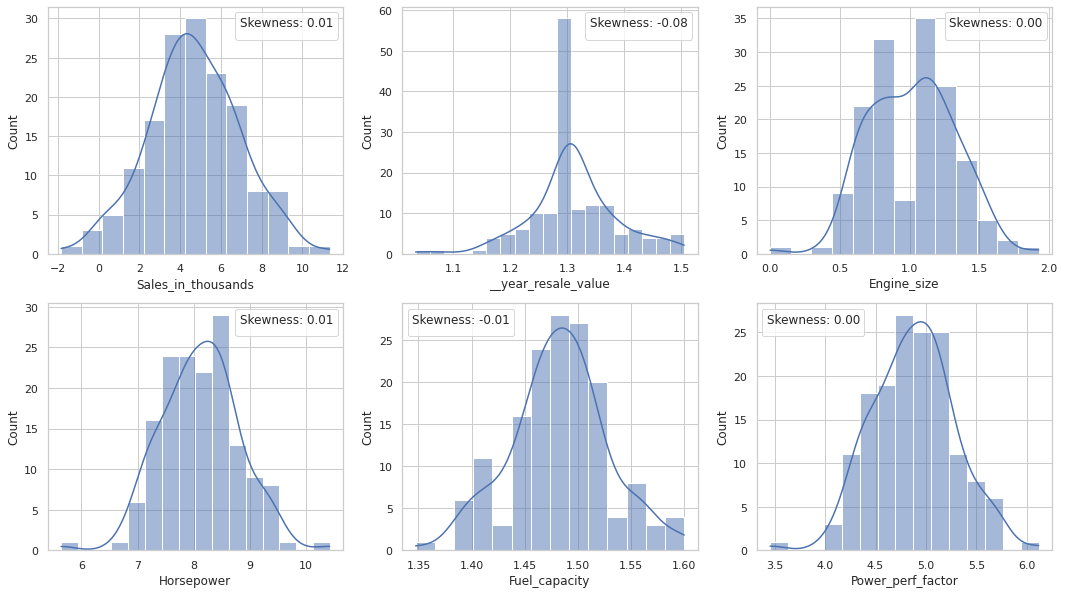

In [29]:
fig, axs = plt.subplots(2, 3, figsize = (18, 10))
row, col = 0, 0
for feature in skewed_features:
    new_car_df[feature], _ = stats.boxcox(new_car_df[feature])
    skewness = new_car_df[feature].skew()
    axs[row, col].legend(loc = 'best', labels = ['_'], title = 'Skewness: %.2f'%(skewness))
    sns.histplot(new_car_df[feature], kde = True, legend = True, ax = axs[row, col])
    col += 1
    if col >= 3:
        col = 0
        row += 1

Quan sát các biểu đồ trên, ta thấy độ lệch sau khi tiền xử lý nằm trong khoảng từ -1 đến 1 và biểu đồ có dạng hình chuông chứng tỏ dữ liệu đã được đưa về dạng phân phối chuẩn.

Cuối cùng, ta sẽ chuẩn hóa min-max (Min-Max Normalization) các giá trị có trong các cột dạng số để dễ dàng đưa vào các mô hình học máy sau này. Vẫn lưu ý là ta sẽ không chuẩn hóa đối với cột "Price_in_thousands".

In [30]:
normalizing_features = transform_features.drop('Price_in_thousands')
normalizing_features = normalizing_features.insert(len(normalizing_features), 'Age')
min_max_scaler = MinMaxScaler()
new_car_df[normalizing_features] = min_max_scaler.fit_transform(new_car_df[normalizing_features])

In [31]:
new_car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,1,0.415747,0.639523,Passenger,21.50,0.298740,0.402920,0.186551,0.271676,0.306258,0.202339,0.272054,0.433333,0.424314,0.00
1,1,0.527954,0.709378,Passenger,28.40,0.578616,0.632042,0.336226,0.445087,0.579228,0.441120,0.525932,0.333333,0.640585,0.25
3,1,0.336772,0.829878,Passenger,42.00,0.621123,0.597623,0.477223,0.508671,0.628495,0.531683,0.566108,0.233333,0.640686,0.25
4,1,0.439190,0.746298,Passenger,23.99,0.298740,0.435156,0.216920,0.323699,0.380826,0.299973,0.482804,0.400000,0.459679,0.25
5,1,0.428740,0.763885,Passenger,33.95,0.514740,0.573513,0.349241,0.780347,0.567244,0.453087,0.589864,0.233333,0.602953,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,0.246636,0.577568,Passenger,24.40,0.325560,0.465637,0.171367,0.289017,0.362184,0.311939,0.448297,0.333333,0.487180,0.25
153,1,0.403006,0.577568,Passenger,27.50,0.440196,0.488893,0.266811,0.387283,0.486019,0.357085,0.561236,0.333333,0.516228,0.00
154,1,0.420145,0.577568,Passenger,28.80,0.440196,0.488893,0.266811,0.387283,0.490013,0.370955,0.561236,0.333333,0.519624,0.25
155,1,0.245244,0.577568,Passenger,45.50,0.419462,0.656080,0.266811,0.514451,0.483356,0.463965,0.589864,0.266667,0.692564,0.25


Các cột dạng số đều có giá trị nằm trong khoảng từ 0 đến 1.

### Mã hóa đặc trưng (Feature Encoding)

Ta nhận thấy các cột còn lại như "Manufacturer" và "Vehicle_type" vẫn thuộc dạng phân loại. Để hoàn thiện quá trình biến dữ liệu dạng phân loại về dạng số phù hợp cho các mô hình học máy, ta cần mã hóa các cột này bằng phương pháp One Hot Encoding. Sau đó ta cần đưa cột "Price_in_thousands" về cuối bảng.

In [32]:
new_car_df = pd.get_dummies(data = new_car_df, columns = ['Manufacturer', 'Vehicle_type'])

In [33]:
rearrange_features = new_car_df.columns.drop('Price_in_thousands')
rearrange_features = rearrange_features.insert(len(rearrange_features), 'Price_in_thousands')
new_car_df = new_car_df[rearrange_features]

In [34]:
new_car_df

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger,Price_in_thousands
0,0.415747,0.639523,0.298740,0.402920,0.186551,0.271676,0.306258,0.202339,0.272054,0.433333,0.424314,0.00,1,0,0,1,21.50
1,0.527954,0.709378,0.578616,0.632042,0.336226,0.445087,0.579228,0.441120,0.525932,0.333333,0.640585,0.25,1,0,0,1,28.40
3,0.336772,0.829878,0.621123,0.597623,0.477223,0.508671,0.628495,0.531683,0.566108,0.233333,0.640686,0.25,1,0,0,1,42.00
4,0.439190,0.746298,0.298740,0.435156,0.216920,0.323699,0.380826,0.299973,0.482804,0.400000,0.459679,0.25,1,0,0,1,23.99
5,0.428740,0.763885,0.514740,0.573513,0.349241,0.780347,0.567244,0.453087,0.589864,0.233333,0.602953,0.25,1,0,0,1,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.246636,0.577568,0.325560,0.465637,0.171367,0.289017,0.362184,0.311939,0.448297,0.333333,0.487180,0.25,1,0,0,1,24.40
153,0.403006,0.577568,0.440196,0.488893,0.266811,0.387283,0.486019,0.357085,0.561236,0.333333,0.516228,0.00,1,0,0,1,27.50
154,0.420145,0.577568,0.440196,0.488893,0.266811,0.387283,0.490013,0.370955,0.561236,0.333333,0.519624,0.25,1,0,0,1,28.80
155,0.245244,0.577568,0.419462,0.656080,0.266811,0.514451,0.483356,0.463965,0.589864,0.266667,0.692564,0.25,1,0,0,1,45.50


Dữ liệu có vẻ ổn để sẵn sàng đưa vào các mô hình học máy. Giả sử một hệ thống học máy gặp vấn đề về thời gian và tài nguyên khi xử lý dữ liệu, trong mỗi giai đoạn của bước tiền xử lý dữ liệu, ta có thể xuất ra các file csv đã được tiền xử lý và sau mỗi giai đoạn tiếp tục đọc lại file csv đó và thực hiện tiền xử lý, điều này đảm bảo không bị mất mác dữ liệu trong quá trình xử lý và có thể kịp thời xử lý nếu thất bại ở bất kỳ một giai đoạn nào đó, đặc biệt trong trường hợp nếu đây là dữ liệu có khối lượng lớn thì phương án này là hợp lý.